In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data=pd.read_csv('predict_energy_consumption.xls')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [ ]:
x = data[['temperature','humidity','wind_speed','solar_irradiance']].values
y=data['energy_consumption'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
model = Sequential([
          Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
          Dense(32,activation='relu'),  # Hidden layer with 32 neurons
          Dense(1)  # output layer for regression (1 neuron)
          ])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [ ]:
history = model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 94456.9375 - mae: 279.6144 - val_loss: 83563.7969 - val_mae: 258.7505
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87185.6875 - mae: 266.9365 - val_loss: 82953.0000 - val_mae: 257.5548
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 85120.6719 - mae: 261.7694 - val_loss: 81998.1484 - val_mae: 255.6774
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87638.0703 - mae: 267.9948 - val_loss: 80555.0469 - val_mae: 252.8156
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 88759.5938 - mae: 266.2370 - val_loss: 78468.7578 - val_mae: 248.6186
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 85503.9922 - mae: 263.0407 - val_loss: 75492.2031 - val_mae: 242.5039
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77061.4141 - mae: 247.0555 - val_loss: 71571.0781 - val_mae: 234.1984
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 79395.5312 - mae: 251.0609 - val_loss: 66545.

In [ ]:
test_loss,test_mae=model.evaluate(x_test,y_test,verbose=1)
print(f"Test mean absolute error: {test_mae:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18079.9375 - mae: 115.3944 
Test mean absolute error: 115.65


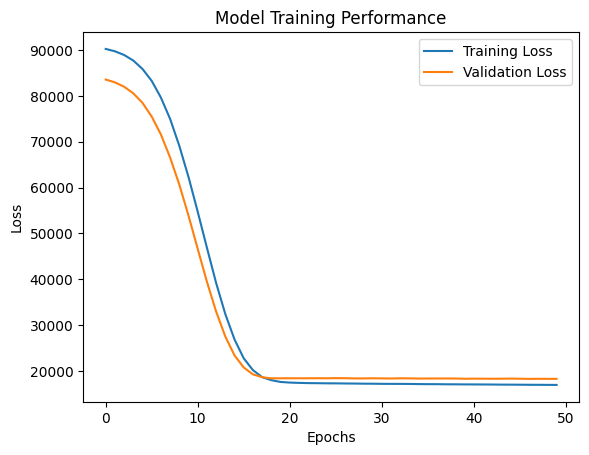

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [ ]:
predections = model.predict(x_test)
predections

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


array([[290.21445],
       [257.78983],
       [258.5475 ],
       [207.89516],
       [342.73145],
       [300.6661 ],
       [325.54813],
       [296.4559 ],
       [287.72516],
       [284.36618],
       [236.1495 ],
       [259.3257 ],
       [281.04913],
       [229.87498],
       [293.60605],
       [308.35458],
       [262.11618],
       [310.19254],
       [299.6787 ],
       [241.17574],
       [276.69357],
       [284.60544],
       [269.69162],
       [275.11197],
       [250.49997],
       [240.33275],
       [260.1814 ],
       [314.941  ],
       [308.82895],
       [271.82632],
       [231.34808],
       [304.4998 ],
       [290.79492],
       [275.23254],
       [309.69196],
       [294.808  ],
       [214.21718],
       [257.00333],
       [279.97794],
       [239.5162 ],
       [242.68892],
       [248.28261],
       [251.56665],
       [264.96603],
       [272.31464],
       [254.56943],
       [264.97812],
       [252.10643],
       [289.07095],
       [300.06015],


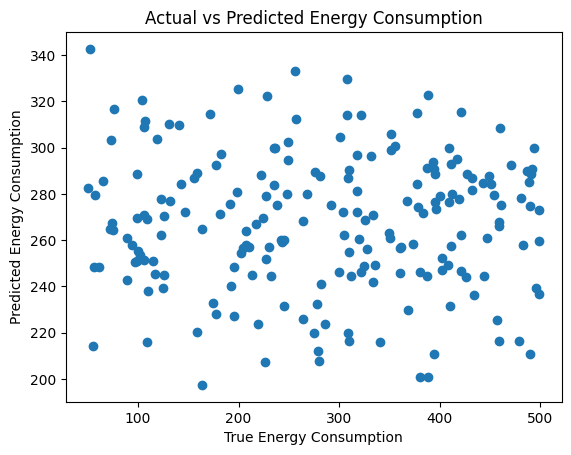

In [ ]:
plt.scatter(y_test,predections)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption')
plt.show()

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression (1 neuron)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [ ]:
history = model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 89111.8750 - mae: 270.7828 - val_loss: 83055.8359 - val_mae: 257.7701
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 83521.9375 - mae: 258.5840 - val_loss: 79511.9141 - val_mae: 250.7725
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 85606.8125 - mae: 262.8954 - val_loss: 67129.8750 - val_mae: 224.5552
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 63608.0977 - mae: 218.7510 - val_loss: 38275.4609 - val_mae: 157.7869
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 32630.9082 - mae: 146.1194 - val_loss: 18986.0371 - val_mae: 117.7231
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17960.3926 - mae: 114.9552 - val_loss: 19083.0234 - val_mae: 118.0414
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17425.6152 - mae: 113.2650 - val_loss: 18579.5391 - val_mae: 116.3061
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18032.9434 - mae: 115.9043 - val_loss: 18820

In [ ]:
test_loss,test_mae=model.evaluate(x_test,y_test,verbose=1)
print(f"Test mean absolute error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 17804.8438 - mae: 114.6113
Test mean absolute error: 114.78


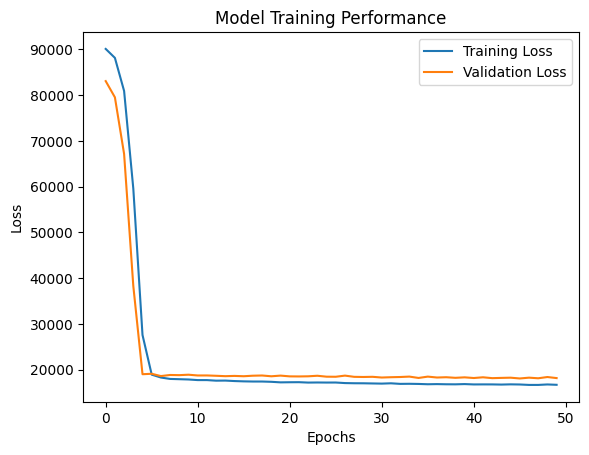

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [ ]:
predections = model.predict(x_test)
predections

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


array([[285.23718],
       [255.85512],
       [254.55775],
       [219.35321],
       [344.6126 ],
       [297.38385],
       [309.51126],
       [291.63867],
       [294.76025],
       [273.22495],
       [238.26067],
       [255.65329],
       [286.57642],
       [243.27902],
       [302.62982],
       [314.4688 ],
       [260.16736],
       [315.8701 ],
       [293.67557],
       [241.9856 ],
       [271.1765 ],
       [287.766  ],
       [282.06235],
       [287.35382],
       [254.81529],
       [249.36946],
       [258.14273],
       [317.34824],
       [311.09863],
       [269.4545 ],
       [242.63431],
       [298.07654],
       [300.20676],
       [256.20615],
       [307.59836],
       [292.9437 ],
       [223.5309 ],
       [262.6144 ],
       [280.7401 ],
       [240.1804 ],
       [251.89131],
       [256.3193 ],
       [253.87175],
       [255.26147],
       [273.05396],
       [256.86526],
       [260.55566],
       [258.55588],
       [296.2776 ],
       [292.6256 ],
